In [2]:
import sys
import pathlib
from os import uname
import json

import numpy as np
import ROOT as rt
from math import ceil, floor

from src.muon_system import MuonSystemAwkward
from src import CMS_lumi, tdrstyle
from src.helper_functions import alert, Table  # , canvas
from src.histo_utilities import create_TH1D, create_TH2D, create_TGraph, std_color_list

from train_bdt import create_hists

# from sklearn.metrics import roc_auc_score  # , roc_curve
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import GradientBoostingClassifier  # , RandomForestClassifier

OUT_DIR = "reports/weekly/2023-09-14"
T2_OUT_DIR = "/storage/af/user/psimmerl/LLP/mdc_analysis"  # os.getcwd()
LOCAL_OUT_DIR = "/home/psimmerl/LLP/mdc_analysis"  # os.getcwd()

DATA_VERSION = "6"
LUMI = 23.02 * 1000

T2_DATA_DIR = "/storage/cms/store/user/christiw/displacedJetMuonAnalyzer/Run3/V1p19"
LOCAL_DATA_DIR = "/home/psimmerl/LLP/mdc_analysis/data/raw"  # os.getcwd() + "/data/raw"
DATA_DIR = "TIER2" if "caltech" in uname()[1] else "LOCAL"

FN_MC = "ggH_HToSSTobbbb_MH-125_MS-15_CTau1000_13p6TeV_1pb_weighted"
FN_R3 = "DisplacedJet-EXOCSCCluster_Run2022EFG-PromptReco-v1_goodLumi"

ROOT_ERROR_LEVEL = 1001  # rt.kInfo + 1
BOT_MARGIN, TOP_MARGIN = 0.025, 0.1
gc = []

# **************************** #
if "TIER2" in DATA_DIR:
    OUT_DIR = f"{T2_OUT_DIR}/{OUT_DIR}"
    FN_MC = f"{T2_DATA_DIR}/MC_Summer22EE/v1/sixie/v{DATA_VERSION}/normalized/{FN_R3}.root"
    FN_R3 = f"{T2_DATA_DIR}/Data2022/v{DATA_VERSION}/normalized/{FN_R3}.root"
else:
    OUT_DIR = f"{LOCAL_OUT_DIR}/{OUT_DIR}"
    FN_MC = f"{LOCAL_DATA_DIR}/{FN_MC}_v{DATA_VERSION}.root"
    FN_R3 = f"{LOCAL_DATA_DIR}/{FN_R3}_v{DATA_VERSION}.root"
pathlib.Path(OUT_DIR).mkdir(parents=True, exist_ok=True)
# **************************** #
rt.gErrorIgnoreLevel = ROOT_ERROR_LEVEL
# rt.gROOT.SetBatch(True)
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0


# **************************** #
def histo1d(rdfs, vals, filters=None, styles=None):
    pass

/home/psimmerl/mambaforge/envs/ROOT/etc/cling/std.modulemap:257:29: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "memory_resource" [optional] {
                            ^
/home/psimmerl/mambaforge/envs/ROOT/etc/cling/std.modulemap:447:27: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/chrono.h" [optional] {
                          ^
/home/psimmerl/mambaforge/envs/ROOT/etc/cling/std.modulemap:531:41: warning: unknown attribute 'optional' [-Wignored-attributes]
  explicit module "bits_ranges_base_h" [optional] {
                                        ^
/home/psimmerl/mambaforge/envs/ROOT/etc/cling/std.modulemap:538:32: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/ranges_util.h" [optional] {
                               ^
/home/psimmerl/mambaforge/envs/ROOT/etc/cling/std.modulemap:559:40: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/uses_allocator_args.h" [optional] 

Welcome to JupyROOT 6.28/04


In [7]:
# ms_mc = MuonSystemAwkward(FN_MC, name="Signal", nev=N_EVENTS, is_mc=True, lumi=LUMI)
rdf = rt.RDataFrame("MuonSystem", FN_R3)

 FCN=22197.3 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=9.11475e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.40234e+01   3.24212e-03   6.11029e-05  -8.23983e-01
   2  Slope       -3.96795e-02   4.18337e-05   7.88384e-07  -3.39664e+01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


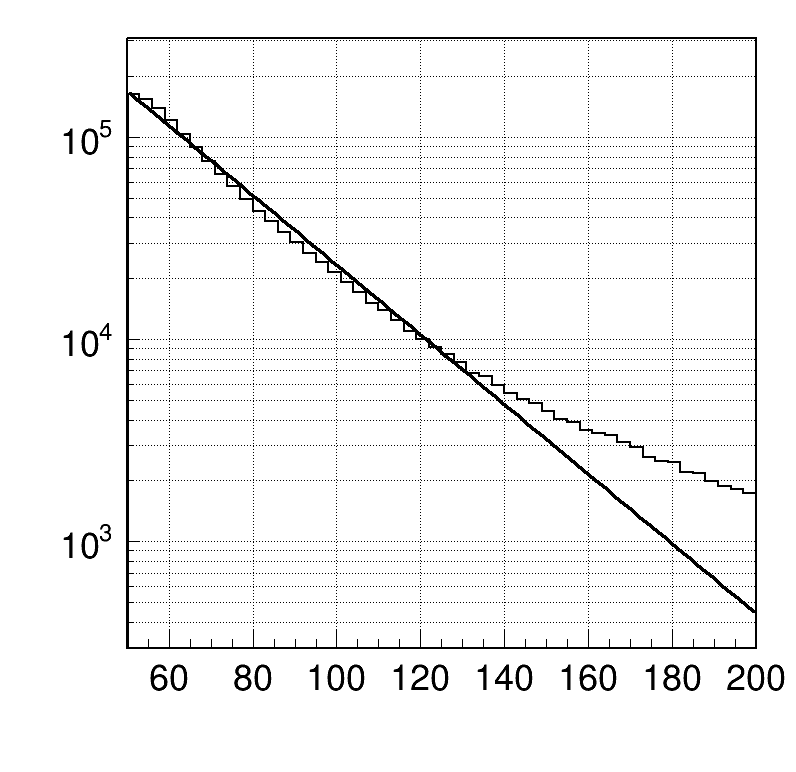

In [21]:
canvas = rt.TCanvas("c", "c", 800, 800)
h1 = rdf.Histo1D(("", "", 50, 50, 200), "dtRechitClusterSize")
h1.Fit("expo")
h1.Draw()
canvas.SetLogy()
canvas.SetGrid()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


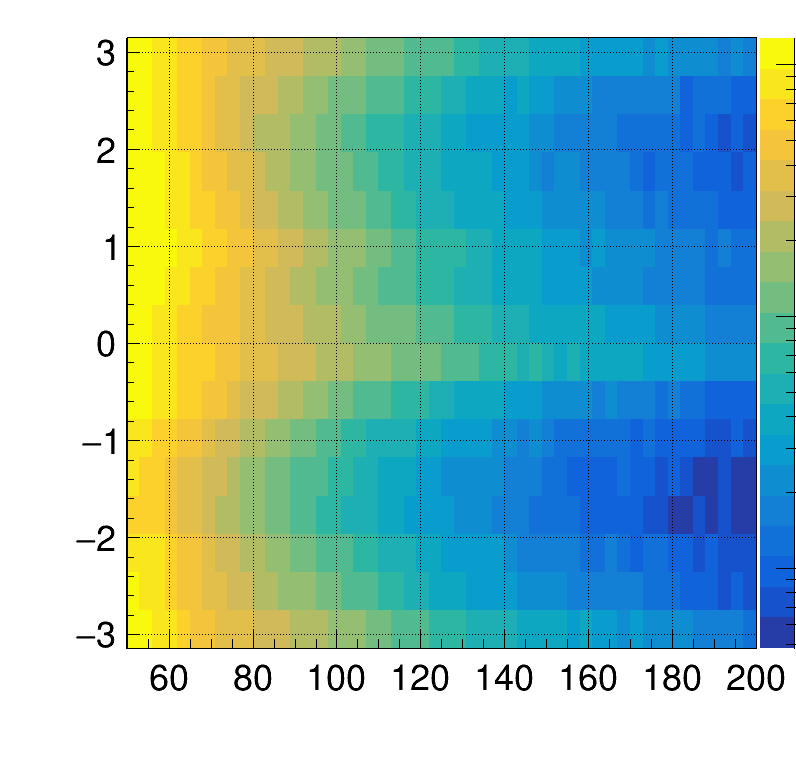

In [26]:
canvas = rt.TCanvas("c", "c", 800, 800)
h2 = rdf.Histo2D(("", "", 50, 50, 200, 16, -np.pi, np.pi), "dtRechitClusterSize", "dtRechitClusterPhi")
h2.Draw("colz")
canvas.SetLogz()
canvas.SetGrid()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


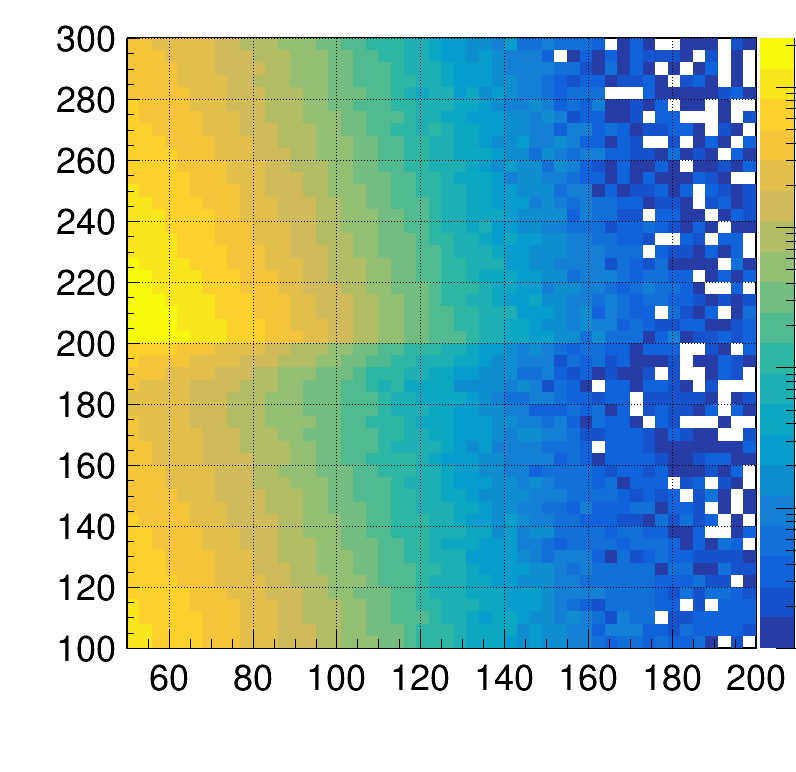

In [30]:
canvas = rt.TCanvas("c", "c", 800, 800)
h2 = rdf.Histo2D(("", "", 50, 50, 200, 50, 100, 300), "met", "cscRechitClusterSize")
h2.Draw("colz")
canvas.SetLogz()
canvas.SetGrid()
canvas.Draw()